In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Working with a table of features from the Saccharomyces Genome Database (SGD)

The file [`SGD_features.tsv`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/SGD_features.tsv) is a tab-delimited file I downloaded from SGD that summarizes key pieces of information about genome features in the budding yeast genome.  The original file can be found here: http://sgd-archive.yeastgenome.org/curation/chromosomal_feature/

Here's a short summary of the contents of this file, from the "SGD_features.README" document:

```
1. Information on current chromosomal features in SGD, including Dubious ORFs. 
Also contains coordinates of intron, exons, and other subfeatures that are located within a chromosomal feature.

2. The relationship between subfeatures and the feature in which they
are located is identified by the feature name in column #7 (parent
feature). For example, the parent feature of the intron found in
ACT1/YFL039C will be YFL039C. The parent feature of YFL039C is
chromosome 6.

3. The coordinates of all features are in chromosomal coordinates.

Columns within SGD_features.tab:

1.   Primary SGDID (mandatory)
2.   Feature type (mandatory)
3.   Feature qualifier (optional)
4.   Feature name (optional)
5.   Standard gene name (optional)
6.   Alias (optional, multiples separated by |)
7.   Parent feature name (optional)
8.   Secondary SGDID (optional, multiples separated by |)
9.   Chromosome (optional)
10.  Start_coordinate (optional)
11.  Stop_coordinate (optional)
12.  Strand (optional)
13.  Genetic position (optional)
14.  Coordinate version (optional)
15.  Sequence version (optional)
16.  Description (optional)

Note that "chromosome 17" is the mitochondrial chromosome.
```


Download [`SGD_features.tsv`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/SGD_features.tsv) to your computer and then load it using the `read_csv` function, specifying the delimiter argument as a tab:

In [2]:
features = pd.read_csv("/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/SGD_features.tsv", delimiter="\t")

## What are the dimensions of this data set?

In [3]:
features.shape

(16454, 16)

## What are the columns names and data types?

In [4]:
features.columns

Index(['SGDID', 'Type', 'Qualifier', 'Name', 'Gene', 'Alias', 'Parent',
       'Secondary', 'Chromosome', 'Start', 'Stop', 'Strand', 'GeneticPosition',
       'CoordVersion', 'SeqVersion', 'Description'],
      dtype='object')

In [10]:
features.dtypes

SGDID               object
Type                object
Qualifier           object
Name                object
Gene                object
Alias               object
Parent              object
Secondary           object
Chromosome          object
Start              float64
Stop               float64
Strand              object
GeneticPosition    float64
CoordVersion        object
SeqVersion          object
Description         object
dtype: object

## How many genome features are there in the  yeast genome?

In [11]:
len(features)  

16454

## What are the different feature types?

In [12]:
features.Type.unique()  # gives unique elements in a column
#same as saying features["Type"]
#

array(['ORF', 'CDS', 'ARS', 'telomere', 'telomeric_repeat', 'X_element',
       'X_element_combinatorial_repeat', 'long_terminal_repeat',
       'ARS_consensus_sequence', 'intron', 'ncRNA_gene', 'noncoding_exon',
       'tRNA_gene', 'snoRNA_gene', 'centromere',
       'centromere_DNA_Element_I', 'centromere_DNA_Element_II',
       'centromere_DNA_Element_III', 'transposable_element_gene',
       'LTR_retrotransposon', 'pseudogene', 'Y_prime_element',
       'five_prime_UTR_intron', 'plus_1_translational_frameshift',
       'matrix_attachment_site', 'gene_group', 'snRNA_gene', 'rRNA_gene',
       'external_transcribed_spacer_region',
       'internal_transcribed_spacer_region', 'non_transcribed_region',
       'blocked_reading_frame', 'origin_of_replication',
       'telomerase_RNA_gene', 'silent_mating_type_cassette_array',
       'W_region', 'X_region', 'Y_region', 'Z1_region', 'Z2_region',
       'mating_type_region', 'intein_encoding_region',
       'not physically mapped', 'not in 

In [13]:
len(features.Type.unique())

44

## Check the chromosome designations

In [14]:
features.Chromosome.unique()
#2-micron: selfish genetic element; molecular parasite; has its own origin of replication; 
        # codes its own genes that helps it propogate

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '2',
       '2-micron', '3', '4', '5', '6', '7', '8', '9', nan], dtype=object)

## Adding a new column - Length

In [15]:
# using np.abs here because for some of the features Start > Stop
features["Length"] = np.abs(features.Stop - features.Start)

In [16]:
features.Length.dtype

dtype('float64')

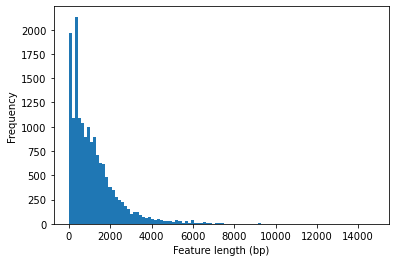

In [17]:
# create a histogram showing distribution of lengths of features
features.Length.plot.hist(bins=100)
plt.xlabel("Feature length (bp)")
pass

## How  many of those features are annotated as "ORFs" (open reading frames)?

In [18]:
orfs = features[features.Type == "ORF"]
len(orfs)

6604

In [41]:
cds = features[features.Type == "CDS"]
len(cds)

7074

## Sorting ORFs based on their length

In [19]:
orfs.sort_values("Length").loc[:,["SGDID", "Chromosome",
                                  "Gene","Length","Description"]].head()

,SGDID,Chromosome,Gene,Length,Description
1254,S000028557,10,NaN,50.0,Putative protein of unknown function; identifi...
10332,S000007602,4,NaN,74.0,Dubious open reading frame; unlikely to encode...
9527,S000007594,2,NaN,74.0,Dubious open reading frame; unlikely to encode...
10593,S000002293,4,RPL41B,77.0,Ribosomal 60S subunit protein L41B; comprises ...
7035,S000005828,15,NaN,77.0,"CPA1 uORF; Arginine attenuator peptide, regula..."


In [20]:
# sort in descending order
orfs.sort_values("Length", ascending=False).loc[:,["SGDID", "Chromosome",
                                                   "Gene","Length","Description"]].head()

,SGDID,Chromosome,Gene,Length,Description
2523,S000004096,12,MDN1,14732.0,Huge dynein-related AAA-type ATPase (midasin);...
8569,S000007260,17,COX1,12883.0,Subunit I of cytochrome c oxidase (Complex IV)...
1973,S000001762,11,DYN1,12278.0,Cytoplasmic heavy chain dynein; microtubule mo...
15453,S000001141,8,TRA1,11234.0,Subunit of SAGA and NuA4 histone acetyltransfe...
12102,S000002865,4,TOM1,9806.0,E3 ubiquitin ligase of the hect-domain class; ...


In [ ]:
cds = features[features.Type == "CDS"]
len(cds)

In [ ]:
#ascending order (smallest to largest)
orfs.sort_values("Length")

In [ ]:
# sort in descending order
orfs.sort_values("Length", ascending=False).loc[:,["SGDID", "Chromosome", "Gene","Length","Description"]].head(10)

In [ ]:
# sort in descending order
orfs.sort_values("Length", ascending=False).loc[:,["SGDID", "Chromosome", "Gene","Length","Description"]].tail()

## Convert the Chromosome data type from object to numerical type

In [21]:
# drop the 2-micron from consideration
orfs = orfs[orfs.Chromosome != "2-micron"].copy() 

# we use copy above because we're going to make some modifications of the ORF data
# so we want an independent copy of the data not a "view" into the features DataFrame

In [22]:
orfs.loc[:,"Chromosome"] = pd.to_numeric(orfs.Chromosome)

In [23]:
orfs.Chromosome.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17,  2,  3,  4,  5,  6,  7,  8,  9],
      dtype=int64)

## Distribution of ORF lengths

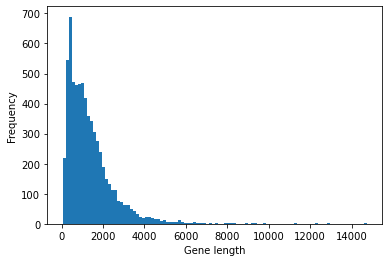

In [24]:

plt.hist(orfs.Length, bins=100)
plt.xlabel("Gene length")
plt.ylabel("Frequency")
pass

Since lengths differ by several orders of magnitude, a log-transform might be useful

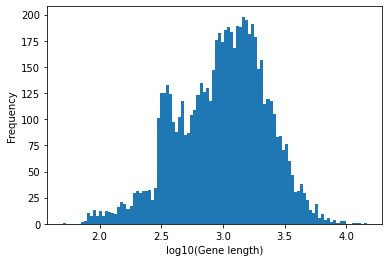

In [25]:
plt.hist(np.log10(orfs.Length),bins = 100)
plt.xlabel("log10(Gene length)")
plt.ylabel("Frequency")
pass

### How many of the ORFS are designated as "Dubious"? How many are "Verified"?

In [26]:
dubious = orfs[orfs.Qualifier == "Dubious"]
len(dubious)

717

In [27]:
verified = orfs[orfs.Qualifier == "Verified"]
len(verified)

5151

### What is the distribution of length of dubious ORFs? What is the distribution of lengths of verified ORFs?

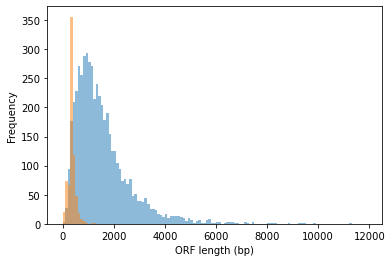

In [28]:
# lengths of verified
plt.hist(verified.Length, alpha=0.5, bins=np.arange(0,12000,100))
#lengths of dubious
plt.hist(dubious.Length, alpha=0.5, bins=np.arange(0,12000,100)) 

# add labels
plt.xlabel("ORF length (bp)")
plt.ylabel("Frequency")
pass


In [29]:
dubious.Length.median(), verified.Length.median()

(347.0, 1283.0)

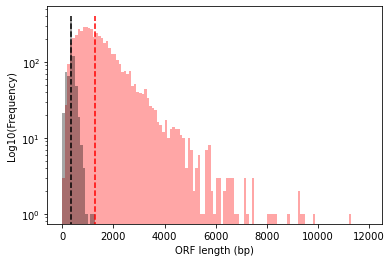

In [32]:
# here we're looking at the the log10 of the frequencies NOT the lengths

# generate histograms
plt.hist(verified.Length, color='red', alpha=0.35, bins=np.arange(0,12000,100),log=True)
plt.hist(dubious.Length, color='black', alpha=0.35, bins=np.arange(0,12000,100), log=True)

# add dashed lines representing median lengths
plt.vlines(dubious.Length.median(), ymin=0, ymax=400, color='black', linestyle="dashed")
plt.vlines(verified.Length.median(), ymin=0, ymax=400, color='red', linestyle="dashed")

# add labels
plt.xlabel("ORF length (bp)")
plt.ylabel("Log10(Frequency)")
pass

## Dubious + Verified is not the full set of ORFS. What are the other Qualifier values?

In [33]:
orfs.Qualifier.unique()
# Uncharacterized and silenced_gene are other qualifier values

array(['Dubious', 'Verified', 'Uncharacterized', 'Verified|silenced_gene'],
      dtype=object)

## Using groupby to get a breakdown of ORFs

In [34]:
orfs.groupby("Qualifier").Qualifier.count()

Qualifier
Dubious                    717
Uncharacterized            728
Verified                  5151
Verified|silenced_gene       4
Name: Qualifier, dtype: int64

In [35]:
orfs.Qualifier.value_counts()  # short hand for counting things in categories

Verified                  5151
Uncharacterized            728
Dubious                    717
Verified|silenced_gene       4
Name: Qualifier, dtype: int64

## Using the groupby method to calculate aggregate statistics

In [36]:
orfs.groupby("Qualifier").Length.median()

Qualifier
Dubious                    347.0
Uncharacterized            579.5
Verified                  1283.0
Verified|silenced_gene     506.5
Name: Length, dtype: float64

## Grouping by multiple variables

In [37]:
orfs.groupby(["Chromosome", "Qualifier"]).Qualifier.count().head(6)
# table continues on but I just took the first six values to truncate output

Chromosome  Qualifier      
1           Dubious             25
            Uncharacterized     15
            Verified            77
2           Dubious             51
            Uncharacterized     46
            Verified           359
Name: Qualifier, dtype: int64

In [38]:
orfs.groupby(["Chromosome", "Qualifier"]).Qualifier.count()

Chromosome  Qualifier             
1           Dubious                    25
            Uncharacterized            15
            Verified                   77
2           Dubious                    51
            Uncharacterized            46
            Verified                  359
3           Dubious                    18
            Uncharacterized            30
            Verified                  132
            Verified|silenced_gene      4
4           Dubious                    89
            Uncharacterized            70
            Verified                  677
5           Dubious                    41
            Uncharacterized            39
            Verified                  243
6           Dubious                    14
            Uncharacterized            21
            Verified                  104
7           Dubious                    55
            Uncharacterized            69
            Verified                  459
8           Dubious                    36

In [39]:
orfs.groupby("Chromosome").Length.median()

Chromosome
1      869.0
2     1065.5
3      942.5
4     1106.0
5      899.0
6     1007.0
7     1088.0
8     1025.0
9      962.0
10    1070.0
11    1107.5
12    1032.5
13    1139.0
14    1118.0
15    1091.0
16    1103.0
17     794.0
Name: Length, dtype: float64

In [40]:
orfs.groupby(["Chromosome", "Qualifier"]).Length.median()

Chromosome  Qualifier             
1           Dubious                    332.0
            Uncharacterized            380.0
            Verified                  1373.0
2           Dubious                    332.0
            Uncharacterized            491.5
            Verified                  1292.0
3           Dubious                    359.0
            Uncharacterized            461.0
            Verified                  1200.5
            Verified|silenced_gene     506.5
4           Dubious                    335.0
            Uncharacterized            645.5
            Verified                  1292.0
5           Dubious                    341.0
            Uncharacterized            437.0
            Verified                  1292.0
6           Dubious                    336.5
            Uncharacterized            524.0
            Verified                  1343.0
7           Dubious                    341.0
            Uncharacterized            536.0
            Verified

## Visualizations of Chromosomes

In [31]:
# load chromosome length data
chroms = pd.read_csv("/Users/pmagwene/Downloads/chromosome_length.tsv", 
                     delimiter="\t")

In [32]:
chroms.head()

,Chromosome,Systematic Name,Length
0,1,NC_001133,230218
1,2,NC_001134,813184
2,3,NC_001135,316620
3,4,NC_001136,1531933
4,5,NC_001137,576874


In [ ]:
x = [1,2,3]
y =['a', 'b', 'c']
list(zip(x,y))
# zip takes two arrays and turns into cuplse

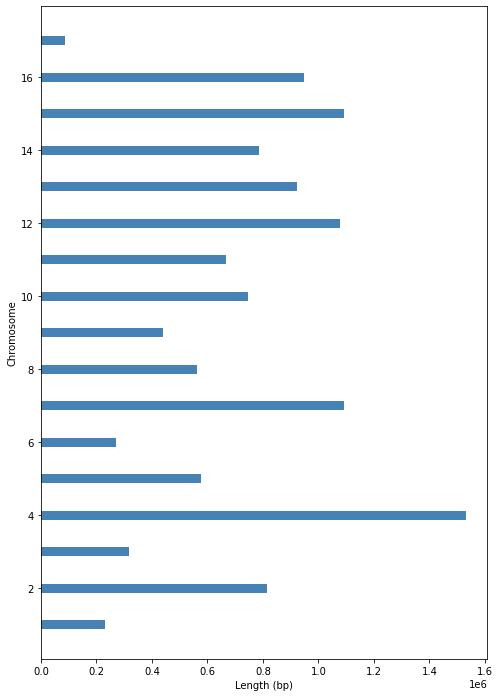

In [33]:
plt.figure(figsize=(8,12))

for (chrnum, length) in zip(chroms.Chromosome, chroms.Length):
    plt.barh(chrnum, length, height=0.25, color='steelblue')
    
plt.xlabel("Length (bp)")
plt.ylabel("Chromosome")
    
pass

## Plot the ORFS on a single chromosome

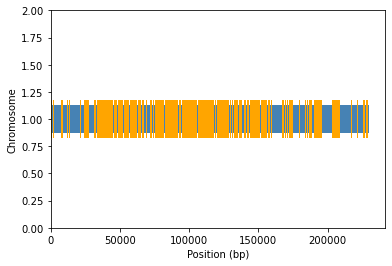

In [34]:
# plot chromosome 1
plt.barh(1, chroms.Length[chroms.Chromosome == 1], height=0.25, color='steelblue')

chr01orfs = orfs[orfs.Chromosome == 1]

# iterating over start and start values of orfs of chromosome 1
for (start, stop) in zip(chr01orfs.Start, chr01orfs.Stop):
    left = min(start, stop)
    width = abs(stop - start)
    plt.barh(1, width, left=left, color='orange', height=0.35)


plt.xlabel("Position (bp)")
plt.ylabel("Chromosome")
    
# specify specific y-axis scaling to make this look nice
plt.ylim(0,2)
pass

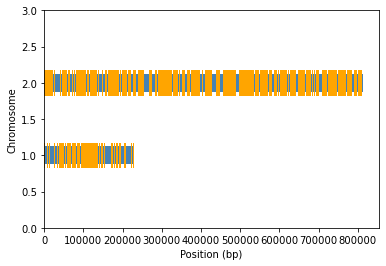

In [35]:
# plot chromosome 1 and 2 orfs

plt.barh(1, chroms.Length[chroms.Chromosome == 1], height=0.25, color='steelblue')
plt.barh(2, chroms.Length[chroms.Chromosome == 2], height=0.25, color='steelblue')

focalorfs = orfs[orfs.Chromosome.isin([1,2])] #difference here

for (chrom, start, stop) in zip(focalorfs.Chromosome, focalorfs.Start, focalorfs.Stop):
    left = min(start, stop)
    width = abs(stop - start)
    plt.barh(chrom, width, left=left, color='orange', height=0.35)
    
plt.xlabel("Position (bp)")
plt.ylabel("Chromosome")
    
# specify specific y-axis scaling to make this look nice
plt.ylim(0,3)
pass